# Brain Space Visualization

## Figure 4 panels B, E, and F

Count the number of extreme (positive & negative) deviations at each brain region and visualize the count for each hemisphere.

In [ ]:
! git clone https://github.com/saigerutherford/CPC_ML_tutorial.git

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('/content/CPC_ML_tutorial')

In [ ]:
Z_df = pd.read_csv('data/Z_long_format.csv')

In [ ]:
# Change this threshold to view more or less extreme deviations.
# Discuss with your partner what you think is an appropriate threshold and adjust the below variables accordingly.
Z_positive = Z_df.query('value > 2')
Z_negative = Z_df.query('value < -2')

In [ ]:
positive_left_z = Z_positive.query('hemi == "left"')
positive_right_z = Z_positive.query('hemi == "right"')
positive_sc_z = Z_positive.query('hemi == "subcortical"')
negative_left_z = Z_negative.query('hemi == "left"')
negative_right_z = Z_negative.query('hemi == "right"')
negative_sc_z = Z_negative.query('hemi == "subcortical"')

In [ ]:
positive_left_z2 = positive_left_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')
positive_right_z2 = positive_right_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')
positive_sc_z2 = positive_sc_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')
negative_left_z2 = negative_left_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')
negative_right_z2 = negative_right_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')
negative_sc_z2 = negative_sc_z['ROI_name'].value_counts().rename_axis('ROI').reset_index(name='counts')

In [ ]:
positive_left_z2.describe()

In [ ]:
positive_right_z2.describe()

In [ ]:
positive_sc_z2.describe()

In [ ]:
negative_left_z2.describe()

In [ ]:
negative_right_z2.describe()

In [ ]:
negative_sc_z2.describe()

In [ ]:
! pip install nilearn

In [ ]:
from nilearn import plotting
import nibabel as nib
from nilearn import datasets

In [ ]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
fsaverage = datasets.fetch_surf_fsaverage()

In [ ]:
# The parcellation is already loaded into memory
parcellation_l = destrieux_atlas['map_left']
parcellation_r = destrieux_atlas['map_right']

In [ ]:
nl = pd.read_csv('data/nilearn_order.csv')

In [ ]:
atlas_r = destrieux_atlas['map_right']
atlas_l = destrieux_atlas['map_left']

In [ ]:
nl_ROI = nl['ROI'].to_list()

### Extreme positive deviation viz

In [ ]:
nl_positive_left = pd.merge(nl, positive_left_z2, on='ROI', how='left')
nl_positive_right = pd.merge(nl, positive_right_z2, on='ROI', how='left')

In [ ]:
nl_positive_left['counts'] = nl_positive_right['counts'].fillna(0)
nl_positive_right['counts'] = nl_positive_right['counts'].fillna(0)

In [ ]:
nl_positive_left = nl_positive_left['counts'].to_numpy()
nl_positive_right = nl_positive_right['counts'].to_numpy()

In [ ]:
a_list = list(range(1, 76))
parcellation_positive_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_positive_l = np.where(parcellation_positive_l == j, nl_positive_left[i], parcellation_positive_l)

In [ ]:
a_list = list(range(1, 76))
parcellation_positive_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_positive_r = np.where(parcellation_positive_r == j, nl_positive_right[i], parcellation_positive_r)

In [ ]:
# you can click around in 3D space on this visualization. Scroll in/out, move the brain around, etc. Have fun with it :) 
view = plotting.view_surf(fsaverage.infl_right, parcellation_positive_r, threshold=None, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_right)

view

In [ ]:
view = plotting.view_surf(fsaverage.infl_left, parcellation_positive_l, threshold=None, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_left)

view

### Extreme negative deviation viz

In [ ]:
nl_negative_left = pd.merge(nl, negative_left_z2, on='ROI', how='left')
nl_negative_right = pd.merge(nl, negative_right_z2, on='ROI', how='left')

In [ ]:
nl_negative_left['counts'] = nl_negative_left['counts'].fillna(0)
nl_negative_right['counts'] = nl_negative_right['counts'].fillna(0)

In [ ]:
nl_negative_left = nl_negative_left['counts'].to_numpy()
nl_negative_right = nl_negative_right['counts'].to_numpy()

In [ ]:
a_list = list(range(1, 76))
parcellation_negative_l = atlas_l
for i, j in enumerate(a_list):
    parcellation_negative_l = np.where(parcellation_negative_l == j, nl_negative_left[i], parcellation_negative_l)

In [ ]:
a_list = list(range(1, 76))
parcellation_negative_r = atlas_r
for i, j in enumerate(a_list):
    parcellation_negative_r = np.where(parcellation_negative_r == j, nl_negative_right[i], parcellation_negative_r)

In [ ]:
view = plotting.view_surf(fsaverage.infl_right, parcellation_negative_r, threshold=None, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_right)

view

In [ ]:
view = plotting.view_surf(fsaverage.infl_left, parcellation_negative_l, threshold=None, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_left)

view

## Figure 4 panel C

In [ ]:
Z_df = pd.read_csv('/content/.csv')

In [172]:
deviation_counts = Z_df[roi_ids]

In [ ]:
deviation_counts['positive_count'] = deviation_counts[deviation_counts >= 2].count(axis=1)

In [ ]:
deviation_counts['negative_count'] = deviation_counts[deviation_counts <= -2].count(axis=1)

In [ ]:
deviation_counts['participant_id'] = Z_df['participant_id']
deviation_counts['group_ID'] = Z_df['group_ID']
deviation_counts['site_ID'] = Z_df['site_ID']

In [ ]:
deviation_counts['all_counts'] = deviation_counts['positive_count'] + deviation_counts['negative_count']

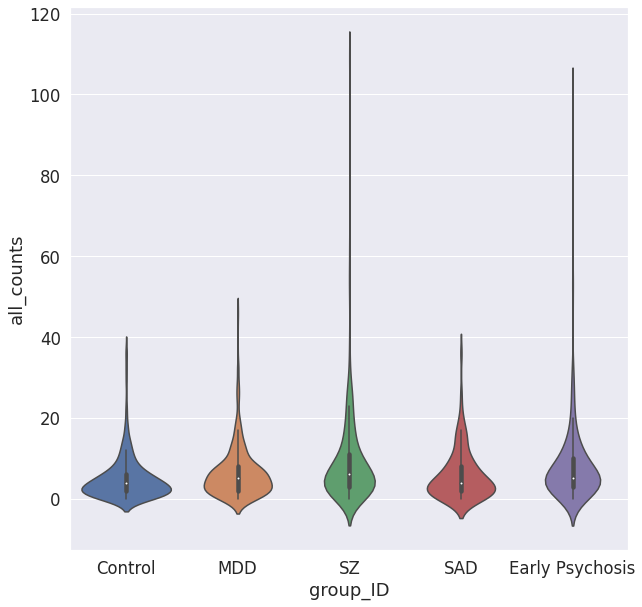

In [221]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(data=deviation_counts, y="all_counts", x="group_ID", inner='box', ax=ax);
plt.legend=False

## Figure 4 panel D

### Preparing dummy data for plotting

Now, we plot the centiles of variation estimated by the normative model. 

We do this by making use of a set of dummy covariates that span the whole range of the input space (for age) for a fixed value of the other covariates (e.g. sex) so that we can make predictions for these dummy data points, then plot them. We configure these dummy predictions using the same procedure as we used for the real data. We can use the same dummy data for all the IDPs we wish to plot

In [ ]:
# which sex do we want to plot? 
sex = 1 # 1 = male 0 = female
if sex == 1: 
    clr = 'blue';
else:
    clr = 'red'

# create dummy data for visualisation
print('configuring dummy data ...')
xx = np.arange(xmin, xmax, 0.5)
X0_dummy = np.zeros((len(xx), 2))
X0_dummy[:,0] = xx
X0_dummy[:,1] = sex

# create the design matrix
X_dummy = create_design_matrix(X0_dummy, xmin=xmin, xmax=xmax, site_ids=None, all_sites=site_ids_tr)

# save the dummy covariates
cov_file_dummy = os.path.join(out_dir,'cov_bspline_dummy_mean.txt')
np.savetxt(cov_file_dummy, X_dummy)

### Plotting the normative models

Now we loop through the IDPs, plotting each one separately. The outputs of this step are a set of quantitative regression metrics for each IDP and a set of centile curves which we plot the test data against. 

This part of the code is relatively complex because we need to keep track of many quantities for the plotting. We also need to remember whether the data need to be warped or not. By default in PCNtoolkit, predictions in the form of `yhat, s2` are always in the warped (Gaussian) space. If we want predictions in the input (non-Gaussian) space, then we need to warp them with the inverse of the estimated warping function. This can be done using the function `nm.blr.warp.warp_predictions()`. 

**Note:** it is necessary to update the intercept for each of the sites. For purposes of visualisation, here we do this by adjusting the median of the data to match the dummy predictions, but note that all the quantitative metrics are estimated using the predictions that are adjusted properly using a learned offset (or adjusted using a hold-out adaptation set, as above). Note also that for the calibration data we require at least two data points of the same sex in each site to be able to estimate the variance. Of course, in a real example, you would want many more than just two since we need to get a reliable estimate of the variance for each site. 

In [ ]:
sns.set(style='whitegrid')

for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')
    idp_dir = os.path.join(out_dir, idp)
    os.chdir(idp_dir)
    
    # load the true data points
    yhat_te = load_2d(os.path.join(idp_dir, 'yhat_predict.txt'))
    s2_te = load_2d(os.path.join(idp_dir, 'ys2_predict.txt'))
    y_te = load_2d(os.path.join(idp_dir, 'resp_te.txt'))
            
    # set up the covariates for the dummy data
    print('Making predictions with dummy covariates (for visualisation)')
    yhat, s2 = predict(cov_file_dummy, 
                       alg = 'blr', 
                       respfile = None, 
                       model_path = os.path.join(idp_dir,'Models'), 
                       outputsuffix = '_dummy')
    
    # load the normative model
    with open(os.path.join(idp_dir,'Models', 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 
    
    # get the warp and warp parameters
    W = nm.blr.warp
    warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 
        
    # first, we warp predictions for the true data and compute evaluation metrics
    med_te = W.warp_predictions(np.squeeze(yhat_te), np.squeeze(s2_te), warp_param)[0]
    med_te = med_te[:, np.newaxis]
    print('metrics:', evaluate(y_te, med_te))
    
    # then, we warp dummy predictions to create the plots
    med, pr_int = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param)
    
    # extract the different variance components to visualise
    beta, junk1, junk2 = nm.blr._parse_hyps(nm.blr.hyp, X_dummy)
    s2n = 1/beta # variation (aleatoric uncertainty)
    s2s = s2-s2n # modelling uncertainty (epistemic uncertainty)
    
    # plot the data points
    y_te_rescaled_all = np.zeros_like(y_te)
    for sid, site in enumerate(site_ids_te):
        # plot the true test data points 
        if all(elem in site_ids_tr for elem in site_ids_te):
            # all data in the test set are present in the training set
            
            # first, we select the data points belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, X_te[:,sid+len(cols_cov)+1] !=0))[0]
            if len(idx) == 0:
                print('No data for site', sid, site, 'skipping...')
                continue
            
            # then directly adjust the data
            idx_dummy = np.bitwise_and(X_dummy[:,1] > X_te[idx,1].min(), X_dummy[:,1] < X_te[idx,1].max())
            y_te_rescaled = y_te[idx] - np.median(y_te[idx]) + np.median(med[idx_dummy])
        else:
            # we need to adjust the data based on the adaptation dataset 
            
            # first, select the data point belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, (df_te['site'] == site).to_numpy()))[0]
            
            # load the adaptation data
            y_ad = load_2d(os.path.join(idp_dir, 'resp_ad.txt'))
            X_ad = load_2d(os.path.join(idp_dir, 'cov_bspline_ad.txt'))
            idx_a = np.where(np.bitwise_and(X_ad[:,2] == sex, (df_ad['site'] == site).to_numpy()))[0]
            if len(idx) < 2 or len(idx_a) < 2:
                print('Insufficent data for site', sid, site, 'skipping...')
                continue
            
            # adjust and rescale the data
            y_te_rescaled, s2_rescaled = nm.blr.predict_and_adjust(nm.blr.hyp, 
                                                                   X_ad[idx_a,:], 
                                                                   np.squeeze(y_ad[idx_a]), 
                                                                   Xs=None, 
                                                                   ys=np.squeeze(y_te[idx]))
        # plot the (adjusted) data points
        plt.scatter(X_te[idx,1], y_te_rescaled, s=4, color=clr, alpha = 0.1)
       
    # plot the median of the dummy data
    plt.plot(xx, med, clr)
    
    # fill the gaps in between the centiles
    junk, pr_int25 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.01,0.99])
    plt.fill_between(xx, pr_int25[:,0], pr_int25[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int95[:,0], pr_int95[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int99[:,0], pr_int99[:,1], alpha = 0.1,color=clr)
            
    # make the width of each centile proportional to the epistemic uncertainty
    junk, pr_int25l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.01,0.99])
    junk, pr_int25u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.01,0.99])    
    plt.fill_between(xx, pr_int25l[:,0], pr_int25u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int95l[:,0], pr_int95u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int99l[:,0], pr_int99u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int25l[:,1], pr_int25u[:,1], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int95l[:,1], pr_int95u[:,1], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int99l[:,1], pr_int99u[:,1], alpha = 0.3,color=clr)

    # plot actual centile lines
    plt.plot(xx, pr_int25[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int25[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,1],color=clr, linewidth=0.5)
    
    plt.xlabel('Age')
    plt.ylabel(idp) 
    plt.title(idp)
    plt.xlim((0,90))
    plt.savefig(os.path.join(idp_dir, 'centiles_' + str(sex)),  bbox_inches='tight')
    plt.show()

os.chdir(out_dir)